# Practical 5: Principal Component Analysis (PCA)
# Name: Snehal Rajendra Gawade


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

In [23]:
df = pd.DataFrame({'x':[2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1],'y':[2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]})

In [25]:
df

,x,y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


In [27]:
df.describe()

,x,y
count,10.000000,10.000000
mean,1.810000,1.910000
std,0.785211,0.846496
min,0.500000,0.700000
25%,1.200000,1.225000
50%,1.950000,1.900000
75%,2.275000,2.625000
max,3.100000,3.000000


In [5]:
x_values_array=df["x"].values
print(type(x_values_array))
y_values_array=df["y"].values

<class 'numpy.ndarray'>


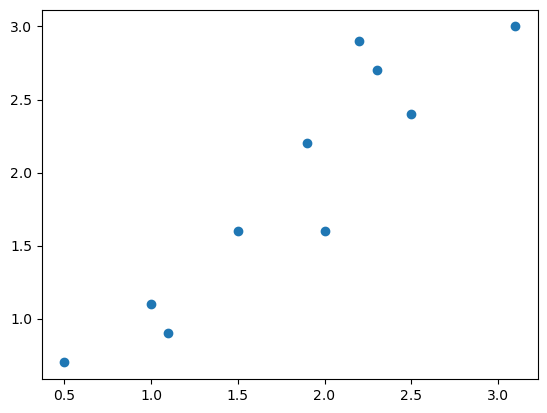

In [33]:
plt.scatter(x='x',y='y', data=df)

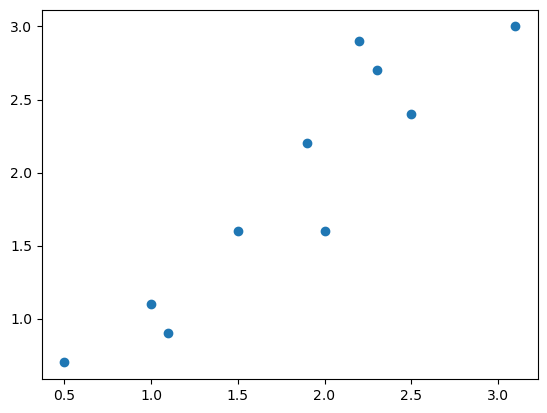

In [6]:
plt.scatter(x_values_array,y_values_array)

In [7]:
df.cov()

,x,y
x,0.616556,0.615444
y,0.615444,0.716556


In [8]:
np.linalg.eig(df.cov())

EigResult(eigenvalues=array([0.0490834 , 1.28402771]), eigenvectors=array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]]))

In [9]:
eigenvalues, eigenvectors=np.linalg.eig(df.cov())

In [10]:
eigenvalues

array([0.0490834 , 1.28402771])

In [11]:
eigenvectors[0]

array([-0.73517866, -0.6778734 ])

In [12]:
V = eigenvectors
print(V[:,0])

[-0.73517866  0.6778734 ]


In [13]:
V = eigenvectors
origin = np.array([[0, 0],[0, 0]]) # origin point

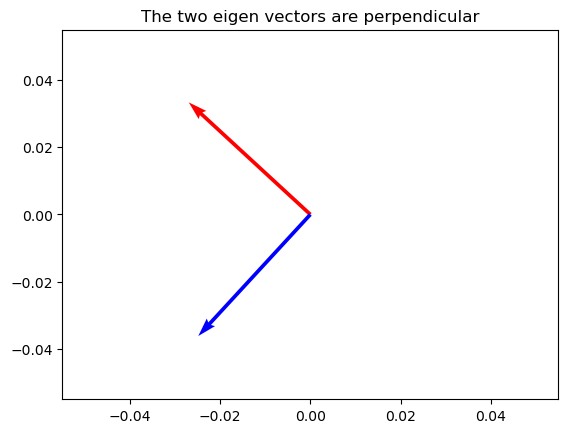

In [14]:
plt.quiver(*origin, V[0], V[1], color=['r','b'], scale=3)
plt.title("The two eigen vectors are perpendicular")
plt.show()


In [15]:
x_bar=statistics.mean(df["x"].values)
x_bar

1.81

In [16]:
y_bar=statistics.mean(df["y"].values)
y_bar

1.9100000000000001

[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


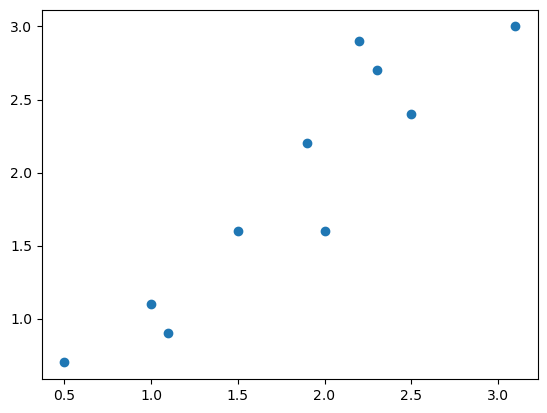

In [17]:
plt.scatter(x_values_array, y_values_array)
V = eigenvectors
print(V)
origin = np.array([[x_bar, x_bar],[y_bar, y_bar]]) # origin point

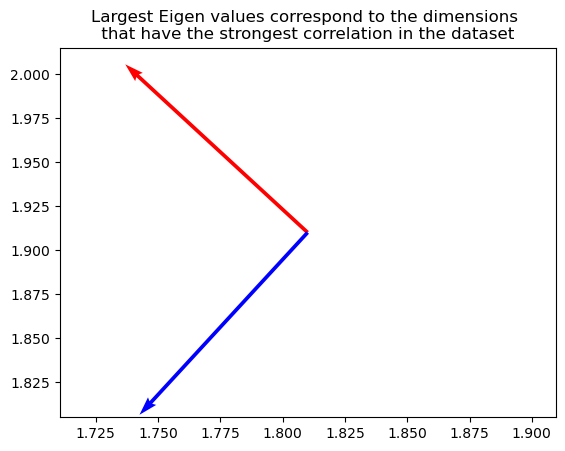

In [18]:
plt.quiver(*origin, V[0], V[1], color=['r','b'], scale=2)
plt.title("Largest Eigen values correspond to the dimensions \n that have the strongest correlation in the dataset ")
plt.show()

In [19]:
eigenvalues

array([0.0490834 , 1.28402771])

In [20]:
lambda_max,lambda_min= max(eigenvalues),min(eigenvalues)

In [21]:
lambda_max

1.2840277121727837

In [22]:
lambda_min

0.04908339893832736

In [23]:
lambda_max_index = np.argmax(eigenvalues)
lambda_min_index = np.argmin(eigenvalues)

In [24]:
lambda_max_index

1

In [25]:
lambda_min_index

0

In [26]:
x_dev=[ele-x_bar for ele in x_values_array]
x_dev

[0.69,
 -1.31,
 0.3900000000000001,
 0.08999999999999986,
 1.29,
 0.48999999999999977,
 0.18999999999999995,
 -0.81,
 -0.31000000000000005,
 -0.71]

In [27]:
y_dev=[ele-y_bar for ele in y_values_array]
y_dev

[0.48999999999999977,
 -1.2100000000000002,
 0.9899999999999998,
 0.29000000000000004,
 1.0899999999999999,
 0.79,
 -0.31000000000000005,
 -0.81,
 -0.31000000000000005,
 -1.0100000000000002]

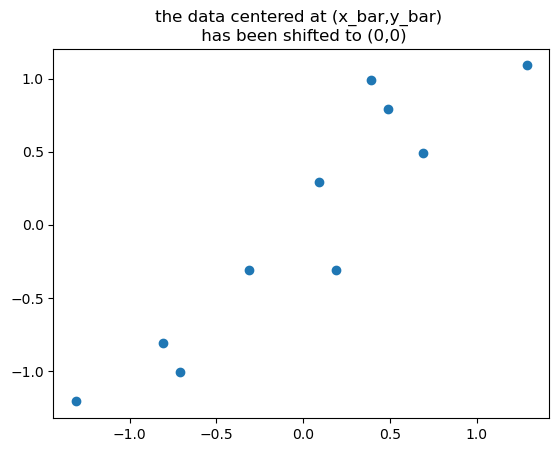

In [28]:
plt.scatter(x_dev,y_dev)
plt.title("the data centered at (x_bar,y_bar) \n has been shifted to (0,0)")
plt.show()

In [29]:
np.column_stack((x_dev,y_dev))

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [30]:
vector1 = eigenvectors[:,1]
vector2 = np.array([1,0])

unit_vector1 = vector1 / np.linalg.norm(vector1)
unit_vector2 = vector2 / np.linalg.norm(vector2)

dot_product = np.dot(unit_vector1, unit_vector2)


In [31]:
angle = -np.arccos(dot_product) #radians
print(angle)
angle_degree=angle*180/math.pi

-2.315662457290723


In [32]:
angle=angle+ math.pi
angle_degree=angle*180/math.pi
print(angle_degree)
print(angle)


47.32231442034831
0.8259301962990699


In [33]:
R=[[math.cos(angle),math.sin(angle)],[-math.sin(angle),math.cos(angle)]]


In [34]:
Rotation_matrix=np.array(R)
Rotation_matrix

array([[ 0.6778734 ,  0.73517866],
       [-0.73517866,  0.6778734 ]])

In [35]:
Rotation_matrix.shape


(2, 2)

In [36]:
data=[x_dev,y_dev]


In [37]:
data_array=np.array(data)


In [38]:
transformed_data=Rotation_matrix @ data_array


In [39]:
transformed_data

array([[ 0.82797019, -1.77758033,  0.99219749,  0.27421042,  1.67580142,
         0.9129491 , -0.09910944, -1.14457216, -0.43804614, -1.22382056],
       [-0.17511531,  0.14285723,  0.38437499,  0.13041721, -0.20949846,
         0.17528244, -0.3498247 ,  0.04641726,  0.01776463, -0.16267529]])

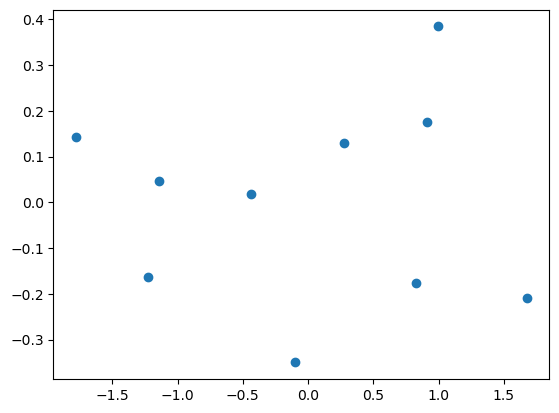

In [40]:
plt.scatter(transformed_data[0], transformed_data[1])


In [41]:
v=eigenvectors
print("EigenVectors: ",v)


EigenVectors:  [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


In [42]:
w=eigenvalues
print("EigenValues: ",w)


EigenValues:  [0.0490834  1.28402771]


In [43]:
w[0]

0.04908339893832736

In [44]:
v[:,0]


array([-0.73517866,  0.6778734 ])